# ***Credit scoring classification***

## ***all Library`s***

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

pd.options.display.max_rows = None
pd.options.display.max_columns = None

## ***Data Source***

In [3]:
dt = pd.read_csv('Project_3_Band_Clean.csv', encoding='ISO-8859-1')
df = dt.copy()

In [4]:
def summary(df):
    summ = pd.DataFrame(df.dtypes, columns=['data type'])
    summ['Len'] = len(df) - df.isnull().sum()
    summ['missing%'] = (df.isnull().sum() / len(df) * 100).values
    summ['Duplicate'] = df.duplicated().sum()
    summ['unique'] = df.nunique().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['min'] = desc['min'].values
    summ['max'] = desc['max'].values
    summ['avg'] = desc['mean'].values
    summ['std dev'] = desc['std'].values
    # summ['top value'] = desc['top'].values
    # summ['Freq'] = desc['freq'].values
    return summ

summary(df).style.background_gradient()

,data type,Len,missing%,Duplicate,unique,min,max,avg,std dev
ID,object,100000,0.000000,0,100000,nan,nan,nan,nan
Customer_ID,object,100000,0.000000,0,12500,nan,nan,nan,nan
Month,object,100000,0.000000,0,8,nan,nan,nan,nan
Name,object,100000,0.000000,0,10139,nan,nan,nan,nan
Age,int64,100000,0.000000,0,46,14.000000,100.000000,33.314320,10.773961
SSN,object,100000,0.000000,0,12500,nan,nan,nan,nan
Occupation,object,100000,0.000000,0,15,nan,nan,nan,nan
Annual_Income,float64,100000,0.000000,0,12500,7005.930000,179987.280000,50505.123449,38299.422093
Monthly_Inhand_Salary,float64,100000,0.000000,0,13235,303.645417,15204.633333,4198.350924,3187.402015
Num_Bank_Accounts,int64,100000,0.000000,0,11,0.000000,10.000000,5.368750,2.593095


In [5]:
df.sample(7)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,DTI_Ratio
53823,0x1515d,CUS_0x529b,August,Katem,32,222-81-7309,Developer,43900.02,3548.335000,8,8,30,4,"Student Loan, Home Equity Loan, Payday Loan, a...",15,16,14.40,15,Standard,2597.20,36.130464,16.00,Yes,111.519608,281.875741,Low_spent_Small_value_payments,251.438151,Poor,73.194893
47797,0x12e0f,CUS_0x4c87,June,Tarah,53,671-87-7765,Musician,40428.66,3553.055000,3,5,6,0,Unknown Loan,7,11,6.66,1,Standard,72.67,25.769422,30.10,No,0.000000,121.290558,High_spent_Small_value_payments,494.014942,Poor,2.045282
20456,0x8dde,CUS_0x3925,January,Praveenj,20,236-45-3040,Journalist,81793.56,6769.130000,6,7,19,3,"Auto Loan, Auto Loan, and Home Equity Loan",10,17,4.47,2,Standard,1208.29,34.784104,29.04,Yes,124.459116,394.899574,Low_spent_Small_value_payments,493.563714,Standard,17.850004
41744,0x10a9a,CUS_0x27e0,January,Matt Scuffhame,34,626-64-3775,Media_Manager,17945.77,1349.480833,6,8,23,9,"Mortgage Loan, Debt Consolidation Loan, Not Sp...",54,17,22.54,10,Bad,4496.04,32.463165,12.09,Yes,108.458828,25.735915,High_spent_Large_value_payments,240.753341,Standard,333.168126
29209,0xc127,CUS_0xab77,February,Sam Cagel,48,686-29-2615,Musician,41736.66,3330.055000,3,3,9,3,"Personal Loan, Auto Loan, and Payday Loan",9,-1,6.25,1,Good,1385.82,40.747151,18.02,No,98.015639,96.049878,Low_spent_Large_value_payments,408.939983,Good,41.615529
7796,0x43ae,CUS_0x1a3b,May,Victoria Thiebergerh,16,173-00-2847,Entrepreneur,33082.87,2785.905833,5,3,12,4,"Payday Loan, Home Equity Loan, Personal Loan, ...",17,16,18.40,12,Standard,576.44,29.596188,19.01,Yes,59578.000000,107.319990,High_spent_Medium_value_payments,343.105687,Standard,20.691295
99098,0x25aa8,CUS_0x55f0,March,Hornbyn,45,564-67-2715,Lawyer,51682.08,4415.840000,7,5,18,7,"Student Loan, Not Specified, Debt Consolidatio...",32,18,19.08,6,Standard,382.05,39.079130,17.09,Yes,224.335599,62.945268,High_spent_Large_value_payments,394.303133,Standard,8.651808


In [8]:
df['Payment_of_Min_Amount'].value_counts()

Payment_of_Min_Amount
Yes    59432
No     40568
Name: count, dtype: int64

In [12]:
df['Credit_Mix'].value_counts()

Credit_Mix
Standard    45848
Good        30384
Bad         23768
Name: count, dtype: int64

In [10]:
df['Credit_Score'].value_counts()

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

# ***Supervised for Classification***

In [19]:
df_Classification = df.copy()

## Scaling 


### **📌 Best Scaling Options**
| **Scaler** | **Use Case** | **Suitability for Your Data** |
|------------|-------------|-------------------------------|
| **StandardScaler (Z-score)** | Works well for normally distributed data, assumes mean = 0, variance = 1. | ❌ Not ideal, since data has outliers and skewed distributions. |
| **MinMaxScaler (0 to 1)** | Best when data is bounded and has no extreme outliers. | ❌ Not suitable due to large outliers (e.g., EMI, DTI_Ratio). |
| **RobustScaler (Median-based)** | Handles **outliers well** by scaling using the **interquartile range (IQR)**. | ✅ **Best choice** as many features have extreme values. |
| **Power Transformer (Yeo-Johnson)** | Normalizes skewed distributions. | ✅ Good for skewed features, but **less interpretable**. |
| **Log Transformation** | Compresses large values and spreads small ones. | ✅ Could work for highly skewed features like DTI_Ratio. |



* RobustScaler

In [22]:
from sklearn.preprocessing import RobustScaler

# Select numerical columns to scale
numeric_features = df_Classification.select_dtypes(include=['number']).columns 

# Initialize RobustScaler
scaler = RobustScaler()
df_Classification[numeric_features] = scaler.fit_transform(df_Classification[numeric_features])


## Encoding

* Frequency Encoding

In [25]:
# Frequency Encoding
object_columns = df_Classification.select_dtypes(include='object').columns  

for column in object_columns:
    freq_encoding = df_Classification[column].value_counts().to_dict()  
    df_Classification[column] = df_Classification[column].map(freq_encoding)

## Splitting data

C:\Users\victus\AppData\Local\Temp\ipykernel_28124\1924773812.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_corr_sorted.values, y=target_corr_sorted.index, palette='viridis')


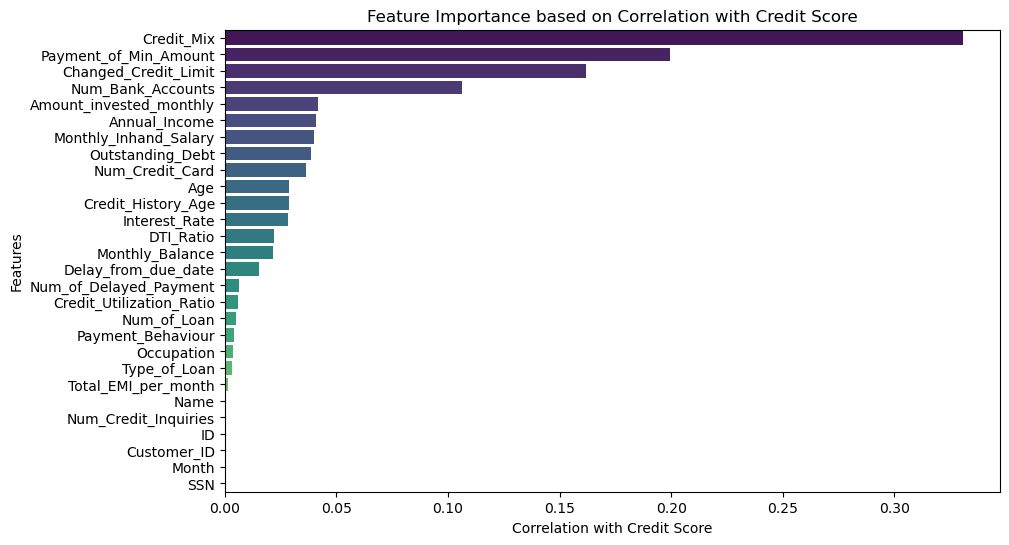

In [27]:
# Compute the correlation matrix
corr_matrix = df_Classification.corr()

# Extract correlations with the target variable 'Credit_Score'
target_corr = corr_matrix['Credit_Score'].drop('Credit_Score')

# Sort features by correlation strength
target_corr_sorted = target_corr.abs().sort_values(ascending=False)

# Plot the correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=target_corr_sorted.values, y=target_corr_sorted.index, palette='viridis')
plt.xlabel("Correlation with Credit Score")
plt.ylabel("Features")
plt.title("Feature Importance based on Correlation with Credit Score")
plt.show()


In [28]:
from sklearn.model_selection import train_test_split
# Separate features (X) and target (y)
X = df_Classification[['Payment_of_Min_Amount', 'Credit_Mix', 'Interest_Rate', 'Changed_Credit_Limit',
                       'Num_Bank_Accounts', 'Num_Credit_Card', 
                       'Credit_History_Age']]

y = df_Classification["Credit_Score"]
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=0)

## Apply Smote

In [30]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=0)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

## Models 

### Random Forest 

In [33]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, bootstrap=True, random_state=77)
classifier.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=77)

In [34]:
y_pred = classifier.predict(X_test)

In [35]:
from sklearn.metrics import classification_report

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

       17828       0.75      0.78      0.77      1783
       28998       0.79      0.81      0.80      2900
       53174       0.83      0.81      0.82      5317

    accuracy                           0.81     10000
   macro avg       0.79      0.80      0.80     10000
weighted avg       0.81      0.81      0.81     10000



# *Save the Model*

* Using Joblib

In [38]:
import joblib

# Assuming `model` is your trained ML model
joblib.dump(classifier, 'Credit_scoring_classification.pkl')

['Credit_scoring_classification.pkl']

In [19]:
# Take a random sample of 1,000 rows
sample_df = df.sample(n=1000, random_state=None)

# Drop the "credit score" column if it exists
sample_df = sample_df.drop(columns=["Credit_Score"], errors="ignore")

# Save the sampled data to a new CSV file
sample_df.to_csv("sampled_data.csv", index=False)

print("Sampled data saved successfully without the 'credit score' column!")

Sampled data saved successfully without the 'credit score' column!


# *THANK YOU!*